<a href="https://colab.research.google.com/github/plaban1981/Pytorch_DL/blob/main/Pytorch_Course_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part1 Tensors

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import time

In [16]:
import urllib.request
url = url = 'https://pytorch.tips/coffee'
fpath = 'coffee.jpg'
urllib.request.urlretrieve(url, fpath)

('coffee.jpg', <http.client.HTTPMessage at 0x7fcc32a3cfd0>)

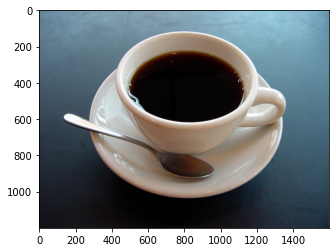

In [17]:
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open('coffee.jpg')
plt.imshow(img)

#### We need to apply a series of preprocessing steps, called transforms, to convert the image into the proper format for the NN. 
* Compose() transform to define a series of transforms
used to preprocess our image.
* We apply Normalize(), to rescale the range of pixel values between 0 and 1.
* The values for the mean and standard deviation (std) were precomputed based on the data used to train the model.
* Tensors are the fundamental data objects in PyTorch
* We do this using Torchvision in the
following code:

In [18]:
import torch 
from torchvision import transforms
#
transform = transforms.Compose([transforms.Resize(256),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485,0.456,0.406],
                                                     std=[0.229,0.224,0.225])])
img_tensor = transform(img)
print(type(img_tensor), img_tensor.shape)

<class 'torch.Tensor'> torch.Size([3, 224, 224])


#### Efficient machine learning processes data in batches, and our model will expect a batch of data

* PyTorch’s unsqueeze() function to add a dimension to
our tensor and create a batch of size 1. 
* Now we have a tensor of size 1 × 3 × 224 × 224, which represents a batch size of 1 and 3 channels (RGB) of 224 × 224 pixels.

In [19]:
batch = img_tensor.unsqueeze(0)
print(batch.shape)

torch.Size([1, 3, 224, 224])


## Using image classifier called AlexNet

* GPU acceleration is a key benefit of PyTorch
* torch. cuda.is_available() function to see if our
machine has a GPU.
* The model.eval() function configures our AlexNet model for
inference or prediction
* The use of model.to(device) and
batch.to(device) sends our model and input data to the GPU
if available

In [20]:
from torchvision import models
model = models.alexnet(weights=True)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
# out(results will vary): cpu
model.eval()
model.to(device)
y = model(batch.to(device))
print(y.shape)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


cpu
torch.Size([1, 1000])


* The output, y, consists of a batch of 1,000 outputs. Since our
batch contains only one image, the first dimension is 1 while
the number of classes is 1000,one value for each class.
* The higher the value, the more likely it is that the image contains that class.

In [21]:
y_max, index = torch.max(y,1)
print(index, y_max)

tensor([967]) tensor([22.8618], grad_fn=<MaxBackward0>)


* PyTorch’s max() function, we see that the class with index
967 has the highest value, 22.3059

## Determine what class 967 represents

967: 'espresso',


Text(0.5, 1.0, "967: 'espresso',")

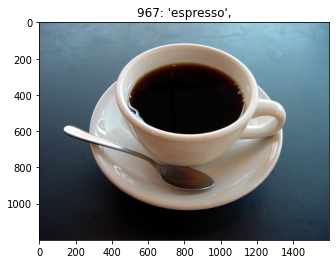

In [22]:
url = 'https://pytorch.tips/imagenet-labels'
fpath = 'imagenet_class_labels.txt'
urllib.request.urlretrieve(url, fpath)
with open('imagenet_class_labels.txt') as f:
  classes = [line.strip() for line in f.readlines()]
print(classes[967])
plt.imshow(img)
plt.title(classes[967])

## Using PyTorch’s softmax() function, we can convert the output values to probabilities:

In [23]:
 prob = torch.nn.functional.softmax(y,dim=1)[0] * 100
 

In [24]:
index[0]

tensor(967)

In [25]:
print(classes[index[0]], prob[index[0]].item())

967: 'espresso', 87.99552154541016


In [33]:
_, indices = torch.sort(y, descending=True)
for idx in indices[0][:5]:
  print(f"label index :{classes[idx].split(':')[0]} ,predicted label : {classes[idx].split(' ')[1]} prediction probability : {prob[idx].item()}")

label index :967 ,predicted label : 'espresso', prediction probability : 87.99552154541016
label index :968 ,predicted label : 'cup', prediction probability : 7.688934326171875
label index :504 ,predicted label : 'coffee prediction probability : 3.8615663051605225
label index :925 ,predicted label : 'consomme', prediction probability : 0.3512957692146301
label index :960 ,predicted label : 'chocolate prediction probability : 0.05007766932249069


## Tensors

* Numpy array

In [34]:
n = np.linspace(0,1,5)
t = torch.linspace(0,1,5)

In [35]:
n

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [36]:
t

tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])

* Tensor

In [37]:
n = np.arange(48).reshape(3,4,4)
t = torch.arange(48).reshape(3,4,4)

In [38]:
n

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31]],

       [[32, 33, 34, 35],
        [36, 37, 38, 39],
        [40, 41, 42, 43],
        [44, 45, 46, 47]]])

In [39]:
t

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15]],

        [[16, 17, 18, 19],
         [20, 21, 22, 23],
         [24, 25, 26, 27],
         [28, 29, 30, 31]],

        [[32, 33, 34, 35],
         [36, 37, 38, 39],
         [40, 41, 42, 43],
         [44, 45, 46, 47]]])

## General Broadcasting Rules

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when

* they are equal, or
* one of them is 1

**Example**: The following are compatible

Shape 1: (1,6,4,1,7,2)

Shape 2: (5,6,1,3,1,2)

In [40]:
a = np.ones((6,5))
b = np.arange(5).reshape((1,5))

In [41]:
a

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [42]:
b

array([[0, 1, 2, 3, 4]])

In [43]:
a + b

array([[1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.],
       [1., 2., 3., 4., 5.]])

The arrays/tensors don't need to have the same number of dimenions. If one of the arrays/tensors has less dimensions than the other

**Example**: Scaling each other the color channels of an image by a different amount:

* Image  (3d array): 256 x 256 x 3
* Scale  (1d array):             3
* Result (3d array): 256 x 256 x 3

In [44]:
Image = torch.randn((256,256,3))
Scale = torch.tensor([0.5,1.5,1])

In [45]:
Image.shape

torch.Size([256, 256, 3])

In [46]:
Scale.shape

torch.Size([3])

In [47]:
Result = Image*Scale

In [48]:
Result.shape

torch.Size([256, 256, 3])

In [49]:
Result.shape

torch.Size([256, 256, 3])

**Example**: One has an array of 2 images and wants to scale the color channels of each image by a slightly different amount:

* Images  (4d array): 2 x 256 x 256 x 3
* Scales  (4d array): 2 x 1 x 1 x 3
* Results  (4d array): 2 x 256 x 256 x 3

In [50]:
Images = torch.randn((2,256,256,3))
Scales = torch.tensor([0.5,1.5,1,1.5,1,0.5])

In [51]:
Scales.shape

torch.Size([6])

In [52]:
Scales

tensor([0.5000, 1.5000, 1.0000, 1.5000, 1.0000, 0.5000])

In [53]:
Scales = Scales.reshape((2,1,1,3))
Scales

tensor([[[[0.5000, 1.5000, 1.0000]]],


        [[[1.5000, 1.0000, 0.5000]]]])

## Operations Across Dimensions

In [2]:
t = torch.tensor([0.5,1,3,4])
print(t)
torch.mean(t), torch.std(t), torch.max(t), torch.min(t)

tensor([0.5000, 1.0000, 3.0000, 4.0000])


(tensor(2.1250), tensor(1.6520), tensor(4.), tensor(0.5000))

In [6]:
t = torch.arange(20, dtype=float)
t.shape

torch.Size([20])

In [7]:
t

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.], dtype=torch.float64)

In [3]:
t = torch.arange(20, dtype=float).reshape(5,4)
t.shape

torch.Size([5, 4])

In [4]:
t

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]], dtype=torch.float64)

In [8]:
t = torch.arange(20, dtype=float).reshape(5,4)
torch.mean(t, axis=0)#columns

tensor([ 8.,  9., 10., 11.], dtype=torch.float64)

In [9]:
torch.mean(t, axis=1)#rows

tensor([ 1.5000,  5.5000,  9.5000, 13.5000, 17.5000], dtype=torch.float64)

In [10]:
t = torch.randn(5,256,256,3)
t.shape

torch.Size([5, 256, 256, 3])

In [11]:
torch.mean(t,axis=0).shape

torch.Size([256, 256, 3])

In [12]:
torch.mean(t,axis=0)

tensor([[[ 0.1854,  0.3477,  0.9435],
         [-0.6093,  0.2105,  0.2758],
         [ 0.8811,  0.1907,  0.7208],
         ...,
         [-0.1008,  0.5629, -0.5715],
         [ 0.2511, -0.1134, -0.6606],
         [-0.7299, -0.3784, -0.1511]],

        [[-0.0447, -0.1395,  0.2894],
         [ 0.3412,  0.5891,  0.4630],
         [ 0.2662, -0.5645, -0.4660],
         ...,
         [ 0.5572,  0.1391, -0.3379],
         [ 0.8325,  0.9108, -0.4593],
         [-0.1861,  0.2542,  0.3371]],

        [[ 0.1674, -0.1873, -0.8505],
         [-0.2048,  0.0799,  0.1850],
         [ 0.1383,  0.1863,  0.8666],
         ...,
         [-0.1058,  0.4632, -0.2230],
         [-0.9087, -0.5995,  0.3648],
         [ 0.3112, -0.2488, -0.0603]],

        ...,

        [[-0.0660, -0.2530,  0.6915],
         [ 0.2873, -0.3411,  0.2790],
         [-0.3174, -0.4630, -0.0278],
         ...,
         [ 0.2319, -0.7339, -0.1597],
         [-0.0829, -0.1984,  0.3520],
         [-0.1072,  0.2144, -0.3197]],

        [[

In [14]:
torch.mean(t,axis=0).shape

torch.Size([256, 256, 3])

In [13]:
torch.mean(t,axis=-1).shape

torch.Size([5, 256, 256])

* Take only the maximum color channel values (and get the corresponding indices):
* This is done all the time in image segmentation models 

In [16]:
values, indices = torch.max(t,axis=-1)
values.shape

torch.Size([5, 256, 256])

In [17]:
indices.shape

torch.Size([5, 256, 256])

## Where Do Pytorch and Numpy Differ?
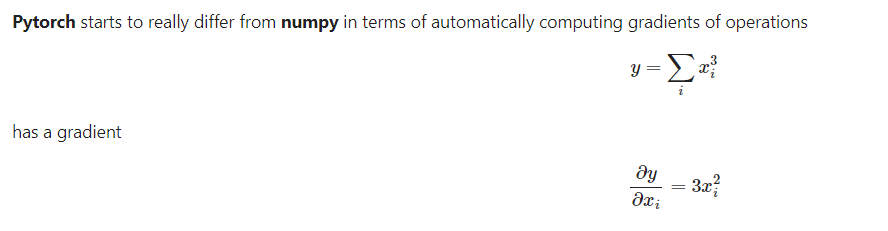

In [19]:
x = torch.tensor([[5.,8.],[4.,6.]])
x

tensor([[5., 8.],
        [4., 6.]])

In [20]:
x = torch.tensor([[5.,8.],[4.,6.]], requires_grad=True)

In [21]:
x

tensor([[5., 8.],
        [4., 6.]], requires_grad=True)

In [23]:
x.pow(3)

tensor([[125., 512.],
        [ 64., 216.]], grad_fn=<PowBackward0>)

In [22]:
y = x.pow(3).sum() # 125. + 512. + 64. + 216.
y

tensor(917., grad_fn=<SumBackward0>)

In [24]:
3 * x.pow(2)

tensor([[ 75., 192.],
        [ 48., 108.]], grad_fn=<MulBackward0>)

In [25]:
print(y.backward()) #compute the gradient
print(x.grad) #print the gradient (everything that has happened to x)

None
tensor([[ 75., 192.],
        [ 48., 108.]])


## Additional Benefits

**In addition, any sort of large matrix multiplication problem is faster with torch tensors than it is with numpy arrays, especially if you're running on a GPU**

Using torch: (with a CPU. With GPU, this is much much faster)

In [26]:
A = torch.randn((1000,1000))
B = torch.randn((1000,1000))

In [27]:
A.shape

torch.Size([1000, 1000])

In [28]:
B.shape

torch.Size([1000, 1000])

In [29]:
t1 = time.perf_counter()
torch.matmul(A,B)
t2 = time.perf_counter()
print(t2-t1)

0.09803720800005067


* using numpy

In [30]:
A = np.random.randn(int(1e6)).reshape((1000,1000))
B = np.random.randn(int(1e6)).reshape((1000,1000))

In [31]:
t1 = time.perf_counter()
A@B
t2 = time.perf_counter()
print(t2-t1)

0.06653472099992541


In [33]:
device = "cuda" if torch.cuda.is_available() else "cpu"
x = torch.tensor([[1,2,3],[4,5,6]],
device=device)
y = torch.tensor([[7,8,9],[10,11,12]],
device=device)
z = x + y
print(z)
print(z.device)
print(z.shape)

tensor([[ 8, 10, 12],
        [14, 16, 18]])
cpu
torch.Size([2, 3])


## Deep Learning Development using Pytorch